In [2]:
from numpy import exp, array, random, dot
 
class NeuralNetwork():
    def __init__(self):
        # Seed el generador de números aleatorios, con una raíz a fin de generar 
        # los mismo números aleatorios en cada proceso.
        random.seed(1)
 
        # Modelamos una sola neurona, con 3 conexiones de entrada y una conexión de salida
        # Asignamos los pesos aleatorios a una matriz de 3x1, con valores en el rango de -1 a 1
        # y significa 0
        self.synaptic_weights = 2 * random.random((3, 1)) - 1
 
    # La función Sigmoid, que describe una curva en forma de S
    # Se pasan la suma ponderada de las entradas a través de esta función para 
    # normalizarlos entre 0 y 1.
    def __sigmoid(self, x):
        return 1 / (1 + exp(-x))
 
    # La derivada de la función Sigmoid.
    # Este es el gradiente de la función Sigmoid.
    # Indica la confianza que tenemos en el peso existente.
    def __sigmoid_derivative(self, x):
        return x * (1 - x)
 
    # Entrenamos a la red neuronal a través de un proceso de prueba y error
    # Se realiza un ajuste de los pesos sinápticos cada vez.
    def train(self, training_set_inputs, training_set_outputs, number_of_training_iterations):
        for iteration in range(number_of_training_iterations):
            # Pasar el conjunto de entrenamiento a través de nuestra red neuronal (una sola neurona)
            output = self.think(training_set_inputs)
 
            # Calcular el error(La diferencia entre el resultado deseado
            # y el resultado obtenido).
            error = training_set_outputs - output
 
            # Multiplica el error por la entrada y nuevamente por el gradiente de la curva Sigmoid
            # Esto significa que los pesos menos confiables se están ajustando más
            # Esto significa que las entradas que son cero, no causan cambios en los pesos.
            adjustment = dot(training_set_inputs.T, error * self.__sigmoid_derivative(output))
 
            # Ajuste de los pesos
            self.synaptic_weights += adjustment
 
    # La red neuronal piensa.
    def think(self, inputs):
        # Pasar las entradas a través de nuestra red neuronal (una neurona)
        return self.__sigmoid(dot(inputs, self.synaptic_weights))
 
 
if __name__ == "__main__":
 
    #Iniciar una red neuronal de una neurona
    neural_network = NeuralNetwork()
 
    print ("Random starting synaptic weights: ")
    print (neural_network.synaptic_weights)
 
    # El conjunto de pruebas. Tenemos cuatro ejemplos, cada uno consiste en 3 valores de entrada
    # y un valor de salida.
    training_set_inputs = array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
    training_set_outputs = array([[0, 1, 1, 0]]).T
 
    # Entrenar la red neuronal utilizando el conjunto de entrenamiento.
    # Realizar 10000 veces y realizar un ajuste más pequeño cada vez.
    neural_network.train(training_set_inputs, training_set_outputs, 10000)
 
    print ("New synaptic weights after training: ")
    print (neural_network.synaptic_weights)
 
    # Prueba la red neuronal con una nueva situación
    print ("Considering new situation [1, 0, 0] -> ?: ")
    print (neural_network.think(array([1, 0, 0])))

Random starting synaptic weights: 
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
New synaptic weights after training: 
[[ 9.67299303]
 [-0.2078435 ]
 [-4.62963669]]
Considering new situation [1, 0, 0] -> ?: 
[0.99993704]


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
table = pd.read_csv('C:/Users/JERAZO/Downloads/MY2014 Fuel Consumption Ratings (5-cycle).csv', encoding = 'unicode_escape', sep=',')

In [3]:
table.head()

,MODEL,MAKE,MODEL.1,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION*,Unnamed: 9,...,Unnamed: 211,Unnamed: 212,Unnamed: 213,Unnamed: 214,Unnamed: 215,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220
0,YEAR,NaN,# = high output engine,NaN,(L),NaN,NaN,TYPE,CITY (L/100 km),HWY (L/100 km),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014,ACURA,ILX,COMPACT,2.0,4.0,AS5,Z,9.9,6.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014,ACURA,ILX,COMPACT,2.4,4.0,M6,Z,11.2,7.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014,ACURA,ILX HYBRID,COMPACT,1.5,4.0,AV7,Z,6.0,5.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6.0,AS6,Z,12.7,9.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
table.describe()

,CYLINDERS,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,...,Unnamed: 211,Unnamed: 212,Unnamed: 213,Unnamed: 214,Unnamed: 215,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220
count,1072.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,5.786381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.797415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
table.shape

(1098, 221)

In [6]:
table.columns

Index(['MODEL', 'MAKE', 'MODEL.1', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION*', 'Unnamed: 9',
       ...
       'Unnamed: 211', 'Unnamed: 212', 'Unnamed: 213', 'Unnamed: 214',
       'Unnamed: 215', 'Unnamed: 216', 'Unnamed: 217', 'Unnamed: 218',
       'Unnamed: 219', 'Unnamed: 220'],
      dtype='object', length=221)

In [7]:
newTable = table[['ENGINE SIZE', 'CYLINDERS', 'FUEL CONSUMPTION*', 'CO2 EMISSIONS ']]
newTable.head()

,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION*,CO2 EMISSIONS
0,(L),NaN,CITY (L/100 km),(g/km)
1,2.0,4.0,9.9,196
2,2.4,4.0,11.2,221
3,1.5,4.0,6.0,136
4,3.5,6.0,12.7,255


In [8]:
newTable.hist

<bound method hist_frame of      ENGINE SIZE  CYLINDERS FUEL CONSUMPTION* CO2 EMISSIONS 
0            (L)        NaN   CITY (L/100 km)         (g/km)
1            2.0        4.0               9.9            196
2            2.4        4.0              11.2            221
3            1.5        4.0               6.0            136
4            3.5        6.0              12.7            255
5            3.5        6.0              12.1            244
6            3.5        6.0              11.9            230
7            3.5        6.0              11.8            232
8            3.7        6.0              12.8            255
9            3.7        6.0              13.4            267
10           2.4        4.0              10.6            212
11           2.4        4.0              11.2            225
12           3.5        6.0              12.1            239
13           1.8        4.0               9.7            193
14           5.9       12.0              18.0            

C:\Users\JERAZO\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


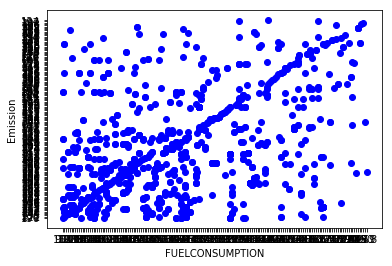

In [9]:
newTable.rename(columns={'ENGINE SIZE':'ENGINESIZE',
                         'CYLINDERS':'CYLINDERS',
                         'FUEL CONSUMPTION*':'FUELCONSUMPTION',
                         'CO2 EMISSIONS ':'CO2EMISSIONS'},
                inplace=True)
plt.show()
plt.scatter(newTable.FUELCONSUMPTION[1:1072], newTable.CO2EMISSIONS[1:1072], color='blue')
plt.xlabel('FUELCONSUMPTION')
plt.ylabel('Emission')
plt.show()

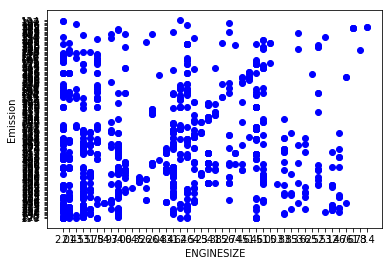

In [21]:
plt.scatter(newTable.ENGINESIZE[1:1072], newTable.CO2EMISSIONS[1:1072], color='blue')
plt.xlabel('ENGINESIZE')
plt.ylabel('Emission')
plt.show()

In [22]:
msk = np.random.rand(len(table)) < 0.8
train = newTable[msk]
test = newTable[~msk]

In [23]:
type(train)

pandas.core.frame.DataFrame

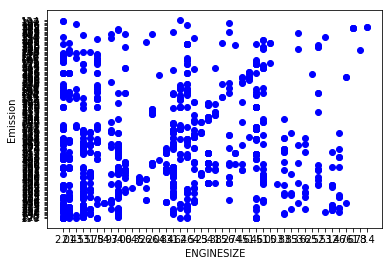

In [24]:
plt.scatter(newTable.ENGINESIZE[1:1072], newTable.CO2EMISSIONS[1:1072], color='blue')
plt.xlabel('ENGINESIZE')
plt.ylabel('Emission')
plt.show()

In [36]:
from sklearn import linear_model
from array import *
import seaborn as sns

regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

regr.fit(train_x[1:862], train_y[1:862])

print('Coeficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)


Coeficients:  [[39.25027688]]
Intercept:  [124.90625599]


In [37]:
train_y_ = regr.predict(train_x[1:862])

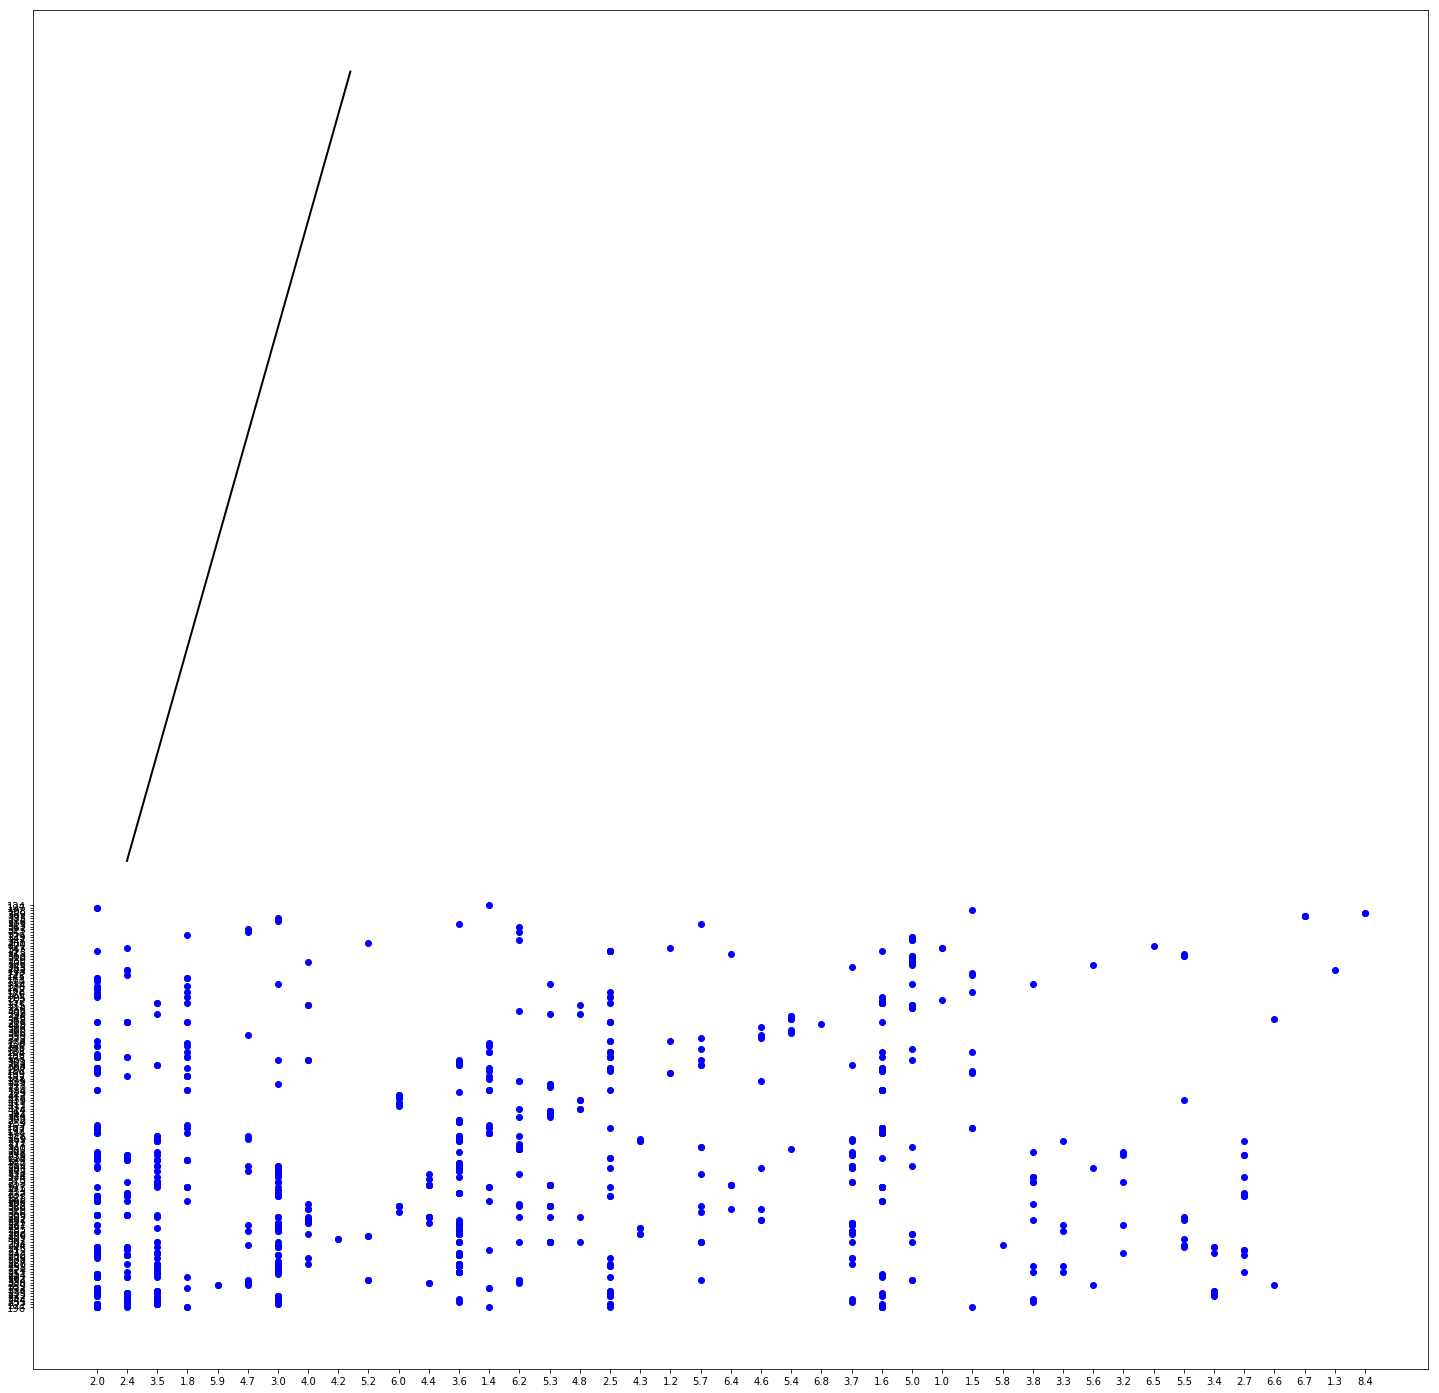

In [38]:
train_x = list(map(float, np.ravel(train_x[1:862]).tolist()))
train_vector_x = np.array(train.ENGINESIZE[1:862])
train_vector_y = np.array(train.CO2EMISSIONS[1:862])
train_y_ = np.ravel(train_y_).tolist()
train_x.sort()
train_y_.sort()
plt.figure(figsize=(25,25))
plt.scatter(train_vector_x, train_vector_y, color='blue')
plt.plot(train_x, train_y_, color='black', linewidth=2)

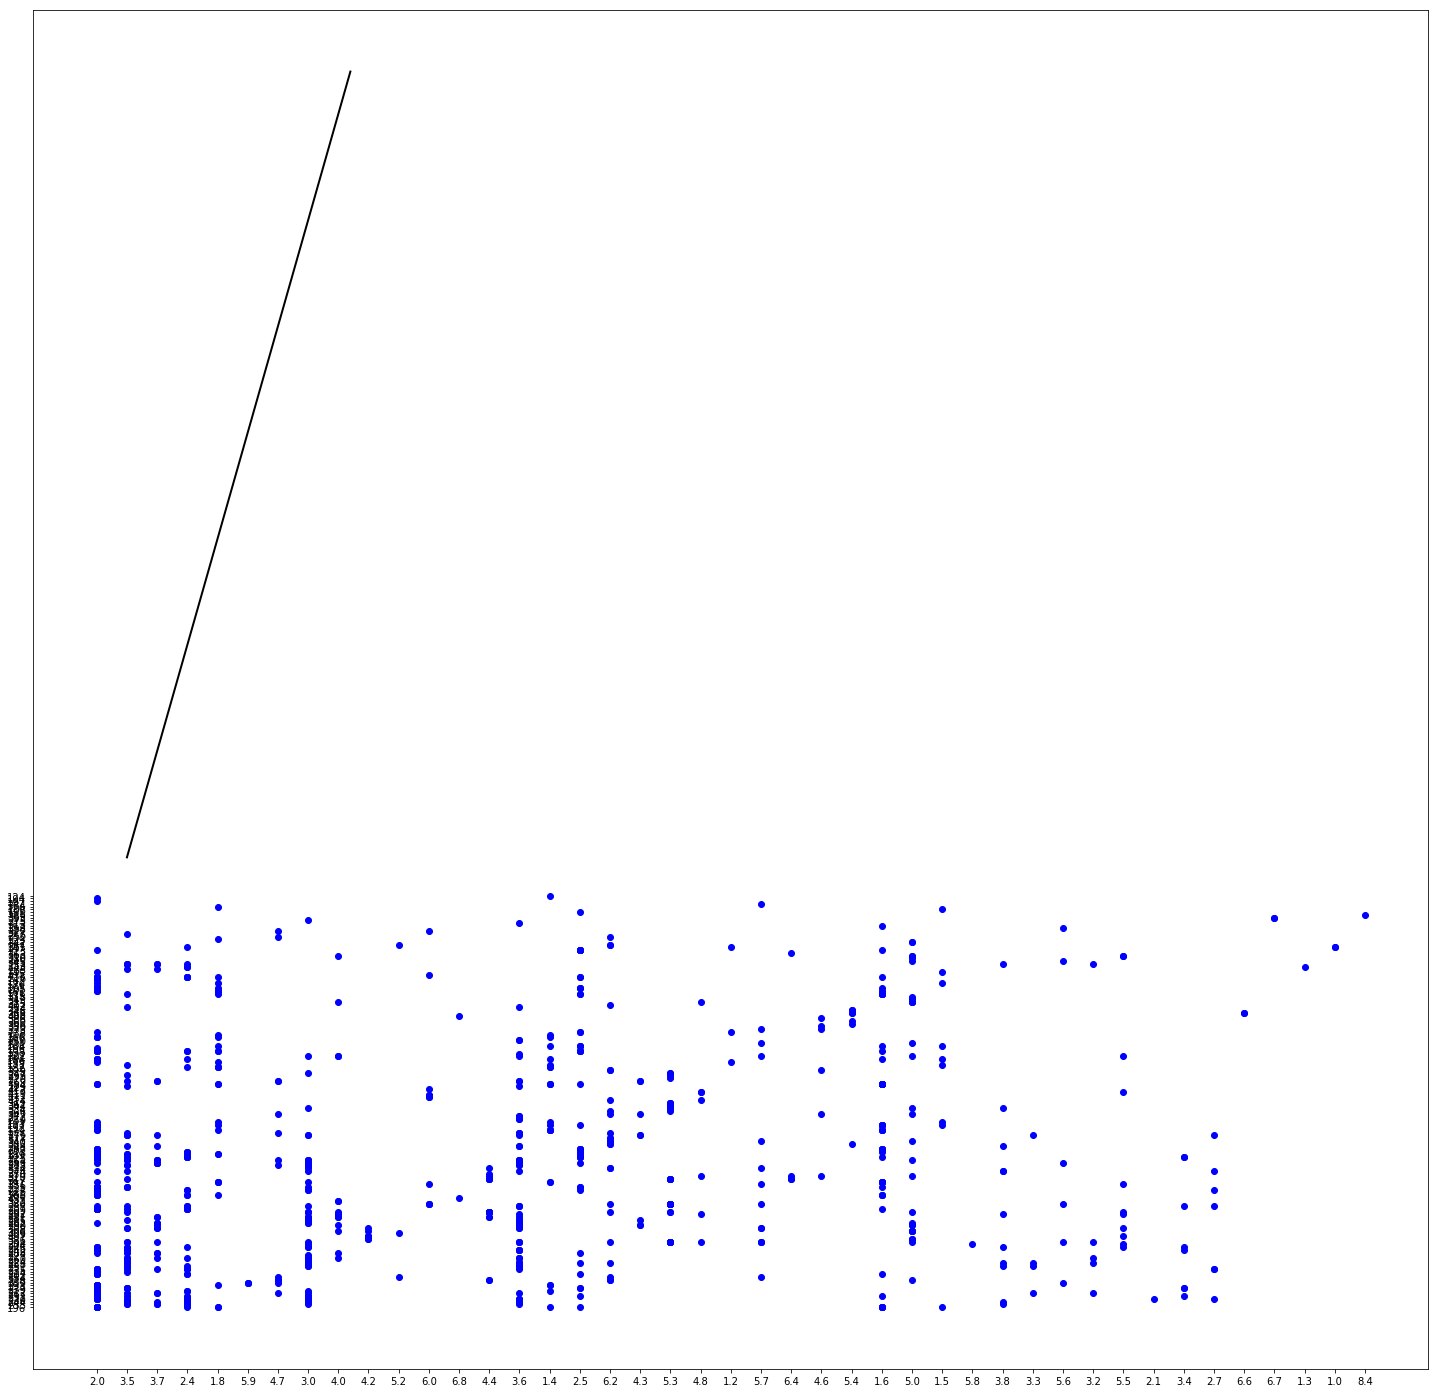

In [482]:
plt.figure(figsize=(25,25))
train_vector_x = np.array(train.ENGINESIZE[1:862])
train_vector_y = np.array(train.CO2EMISSIONS[1:862])
plt.scatter(train_vector_x, train_vector_y, color='blue')
plt.plot(train_x, train_y_, color='black', linewidth=2)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


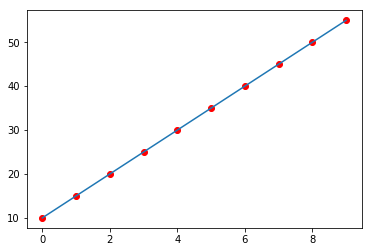

In [16]:
import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt

# Sample data
x = np.arange(10)
y = 5 * x + 10

print(type(x))
print(type(y))
# Fit with polyfit
b, m = polyfit(x, y, 1)

plt.scatter(x, y, color = 'red')
plt.plot(x, b + m * x, '-')
plt.show()